In [8]:
!pip install datasets
!pip install pandas
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install lifelines
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
from datasets import load_dataset
import os

ds = load_dataset("kimnamssya/seer-dataset")

os.makedirs("./sample data/SEER", exist_ok = True)

for split in ds.keys():
  ds[split].to_csv(f"./sample data/SEER/SEER-dataset-{split}.csv")
  print(f"Saved {split} split to ./sample data/SEER/SEER-dataset-{split}.csv")

Creating CSV from Arrow format: 100%|██████████| 36/36 [00:00<00:00, 344.25ba/s]

Saved train split to ./sample data/SEER/SEER-dataset-train.csv


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load the SEER dataset
df = pd.read_csv("./sample data/SEER/SEER-dataset-train.csv")

# Create binary outcome variable (1 for event, 0 for censored)
df['label'] = df['stutus_5_years'].apply(lambda x: 1 if x == 'Dead' else 0)

# Keep original time variable
df['time'] = df['interva_years']

# Identify categorical columns that need one-hot encoding
categorical_cols = [
    'Radiation recode', 
    'Chemotherapy recode', 
    'Radiation sequence with surgery',
    'ER Status Recode Breast Cancer (1990+)', 
    'PR Status Recode Breast Cancer (1990+)',
    'Derived HER2 Recode (2010+)',
    'COD to site recode',
    'Race recode',
    'Sex',
    'Vital status recode (study cutoff used)'
]

# Initialize the encoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Create a new dataframe for encoded features
encoded_df = pd.DataFrame()

# Add time and label as the first columns
encoded_df['time'] = df['time']
encoded_df['label'] = df['label']

# Add numeric columns directly
numeric_cols = [
    'Age at diagnosis', 
    'Regional nodes positive (1988+)', 
    'Total number of in situ/malignant tumors for patient',
    'CS tumor size (2004-2015)', 
    'Regional nodes examined (1988+)'
]

for col in numeric_cols:
    encoded_df[col] = df[col]

# One-hot encode categorical variables
for col in categorical_cols:
    # Fit and transform the column
    encoded_features = encoder.fit_transform(df[[col]])
    
    # Get feature names
    feature_names = [f"{col}_{cat}" for cat in encoder.categories_[0][1:]]
    
    # Create a DataFrame with the encoded features
    temp_df = pd.DataFrame(encoded_features, columns=feature_names)
    
    # Concatenate with the main dataframe
    encoded_df = pd.concat([encoded_df, temp_df], axis=1)

# Save the encoded dataset
encoded_df.to_csv("./sample data/SEER/encoded_SEER_data.csv", index=False)

print("Encoded data saved to './sample data/SEER/encoded_SEER_data.csv'")

/opt/anaconda3/envs/tensorflow1.15_nvidia/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/envs/tensorflow1.15_nvidia/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/envs/tensorflow1.15_nvidia/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/envs/tensorflow1.15_nvidia/lib/python3.8/site-packages/sklearn/preprocessing/_encoder

Encoded data saved to './sample data/SEER/encoded_SEER_data.csv'


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
%matplotlib inline

# Set style for better visualizations
plt.style.use('seaborn-whitegrid')
sns.set_palette('viridis')

# Load the encoded dataset
df = pd.read_csv("./sample data/SEER/encoded_SEER_data.csv")

# Load the encoding mapping for reference
with open("./sample data/SEER/encoding_mapping.txt", "r") as f:
    mapping_text = f.read()

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (35349, 92)


/tmp/ipykernel_1716838/813281321.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,time,label,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,CS tumor size (2004-2015),Regional nodes examined (1988+),Radiation recode_Combination of beam with implants or isotopes,Radiation recode_None/Unknown,Radiation recode_Radioactive implants (includes brachytherapy) (1988+),...,COD to site recode_Suicide and Self-Inflicted Injury,COD to site recode_Thyroid,COD to site recode_Tongue,COD to site recode_Tuberculosis,COD to site recode_Urinary Bladder,COD to site recode_Vulva,Race recode_Unknown,Race recode_White,Sex_Male,Vital status recode (study cutoff used)_Dead
0,5,0,54,3,1,25,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5,0,59,3,1,36,19,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6,0,54,0,2,6,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6,0,58,0,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,89,0,1,17,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
# Parse the encoding mapping
mapping_dict = {}
current_column = None
current_mapping = {}

for line in mapping_text.split('\n'):
    if line.startswith('Column:'):
        if current_column is not None:
            mapping_dict[current_column] = current_mapping
        current_column = line.replace('Column:', '').strip()
        current_mapping = {}
    elif '->' in line and current_column is not None:
        original, encoded = line.strip().split('->')
        original = original.strip()
        encoded = encoded.strip()
        try:
            current_mapping[original] = int(encoded)
        except:
            current_mapping[original] = encoded

if current_column is not None:
    mapping_dict[current_column] = current_mapping

# Display the first few mappings
for col, mapping in list(mapping_dict.items())[:3]:
    print(f"\nMapping for {col}:")
    for orig, enc in list(mapping.items())[:5]:
        print(f"  {orig} -> {enc}")


Mapping for Radiation recode:
  Beam radiation -> 0
  None/Unknown -> 2
  Radioactive implants (includes brachytherapy) (1988+) -> 3
  Radioisotopes (1988+) -> 4
  Combination of beam with implants or isotopes -> 1

Mapping for Chemotherapy recode:
  Yes -> 1
  No/Unknown -> 0

Mapping for Radiation sequence with surgery:
  Radiation after surgery -> 3
  No radiation and/or cancer-directed surgery -> 2
  Radiation before and after surgery -> 4
  Radiation prior to surgery -> 5
  Intraoperative radiation -> 1


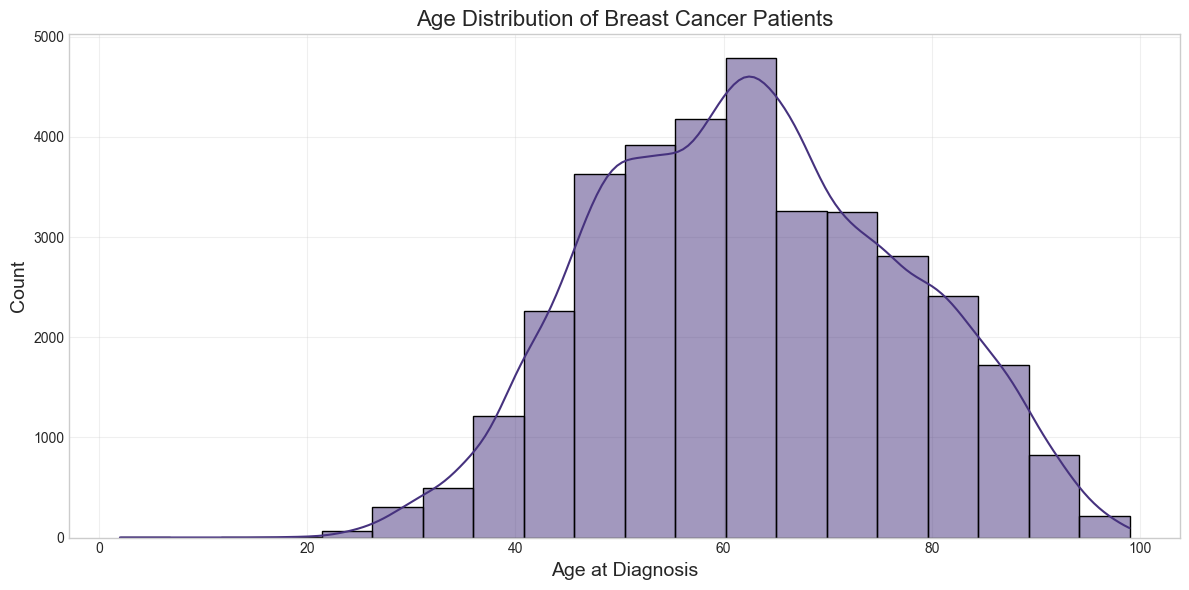

In [38]:
# Visualization 1: Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age at diagnosis', kde=True, bins=20)
plt.title('Age Distribution of Breast Cancer Patients', fontsize=16)
plt.xlabel('Age at Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
# Visualization 2: Survival Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='interva_years', kde=True, bins=15)
plt.title('Distribution of Survival Time', fontsize=16)
plt.xlabel('Survival Time (Years)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `interva_years` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [40]:
# Visualization 3: Cause of Death Distribution
plt.figure(figsize=(12, 6))
cod_counts = df['COD to site recode'].value_counts().sort_index()

# Create labels using the mapping
cod_labels = []
if 'COD to site recode' in mapping_dict:
    for code in cod_counts.index:
        for orig, enc in mapping_dict['COD to site recode'].items():
            if enc == code:
                cod_labels.append(orig)
                break
        else:
            cod_labels.append(f"Code {code}")
else:
    cod_labels = [f"Code {code}" for code in cod_counts.index]

plt.bar(cod_labels, cod_counts.values)
plt.title('Distribution of Cause of Death', fontsize=16)
plt.xlabel('Cause of Death', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

KeyError: 'COD to site recode'

<Figure size 1200x600 with 0 Axes>

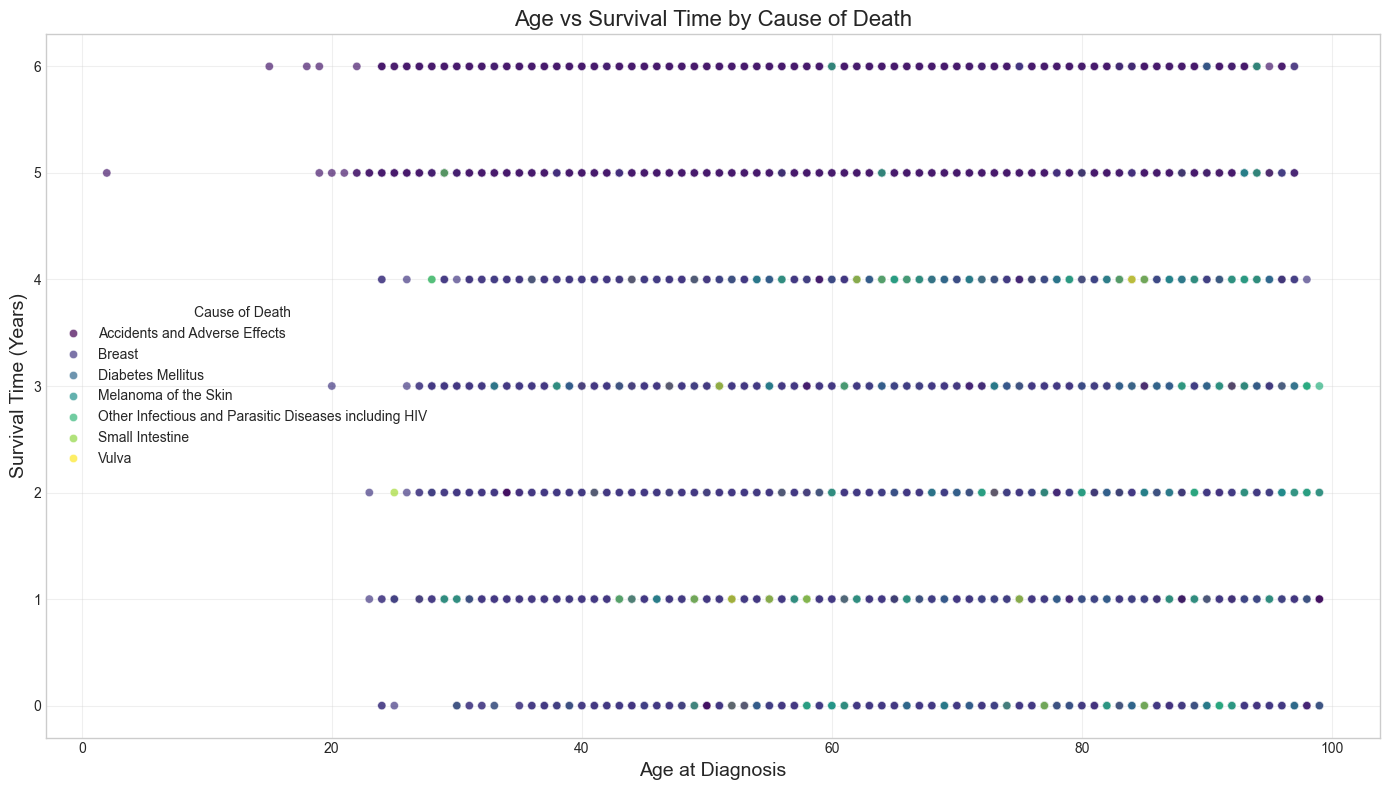

In [ ]:
# Visualization 4: Age vs Survival Time by Cause of Death
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(data=df, x='Age at diagnosis', y='interva_years', 
                          hue='COD to site recode', palette='viridis', alpha=0.7)

# Add a legend with proper labels
if 'COD to site recode' in mapping_dict:
    handles, labels = scatter.get_legend_handles_labels()
    new_labels = []
    for label in labels:
        for orig, enc in mapping_dict['COD to site recode'].items():
            if str(enc) == label:
                new_labels.append(orig)
                break
        else:
            new_labels.append(f"Code {label}")
    plt.legend(handles, new_labels, title='Cause of Death', loc='best')

plt.title('Age vs Survival Time by Cause of Death', fontsize=16)
plt.xlabel('Age at Diagnosis', fontsize=14)
plt.ylabel('Survival Time (Years)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Radiation recode` for `x`. An entry with this name does not appear in `data`.

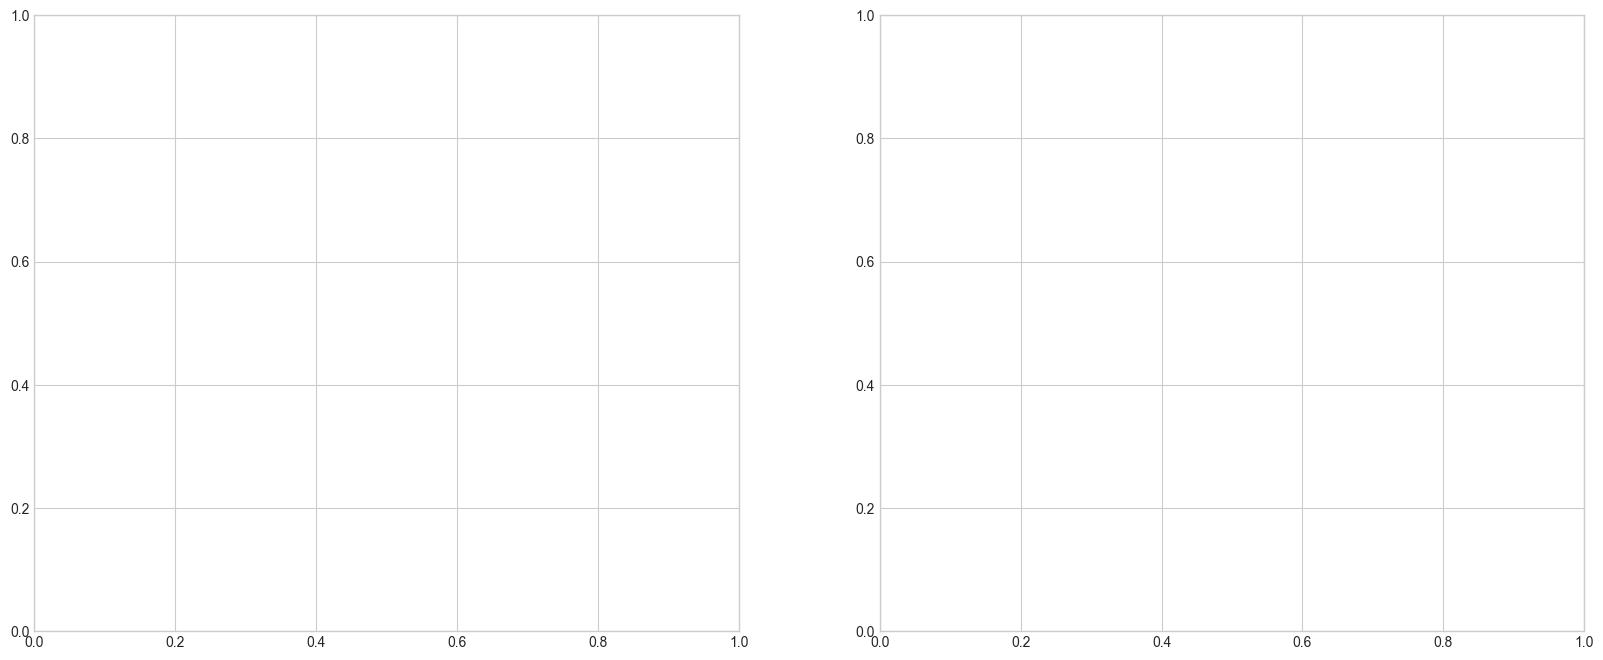

In [41]:
# Visualization 5: Treatment Impact on Survival
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Radiation impact
sns.boxplot(x='Radiation recode', y='interva_years', hue='COD to site recode', data=df, ax=axes[0])

# Add proper labels for radiation
if 'Radiation recode' in mapping_dict:
    x_labels = []
    for code in sorted(df['Radiation recode'].unique()):
        for orig, enc in mapping_dict['Radiation recode'].items():
            if enc == code:
                x_labels.append(orig)
                break
        else:
            x_labels.append(f"Code {code}")
    axes[0].set_xticklabels(x_labels)

axes[0].set_title('Impact of Radiation on Survival Time', fontsize=16)
axes[0].set_xlabel('Radiation Treatment', fontsize=14)
axes[0].set_ylabel('Survival Time (Years)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Chemotherapy impact
sns.boxplot(x='Chemotherapy recode', y='interva_years', hue='COD to site recode', data=df, ax=axes[1])

# Add proper labels for chemotherapy
if 'Chemotherapy recode' in mapping_dict:
    x_labels = []
    for code in sorted(df['Chemotherapy recode'].unique()):
        for orig, enc in mapping_dict['Chemotherapy recode'].items():
            if enc == code:
                x_labels.append(orig)
                break
        else:
            x_labels.append(f"Code {code}")
    axes[1].set_xticklabels(x_labels)

axes[1].set_title('Impact of Chemotherapy on Survival Time', fontsize=16)
axes[1].set_xlabel('Chemotherapy Treatment', fontsize=14)
axes[1].set_ylabel('Survival Time (Years)', fontsize=14)

plt.tight_layout()
plt.show()

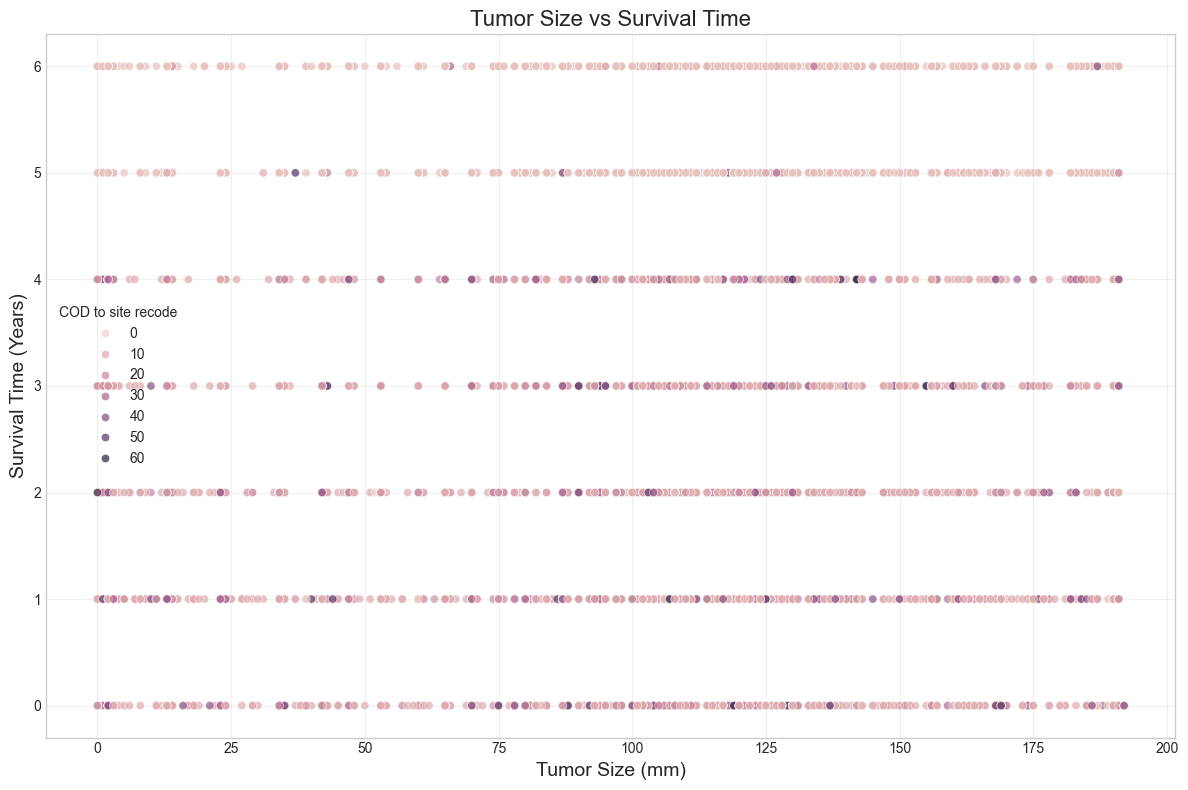

In [ ]:
# Visualization 6: Tumor Size vs Survival Time
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CS tumor size (2004-2015)', y='interva_years', 
                hue='COD to site recode', data=df, alpha=0.7)
plt.title('Tumor Size vs Survival Time', fontsize=16)
plt.xlabel('Tumor Size (mm)', fontsize=14)
plt.ylabel('Survival Time (Years)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `ER Status Recode Breast Cancer (1990+)` for `x`. An entry with this name does not appear in `data`.

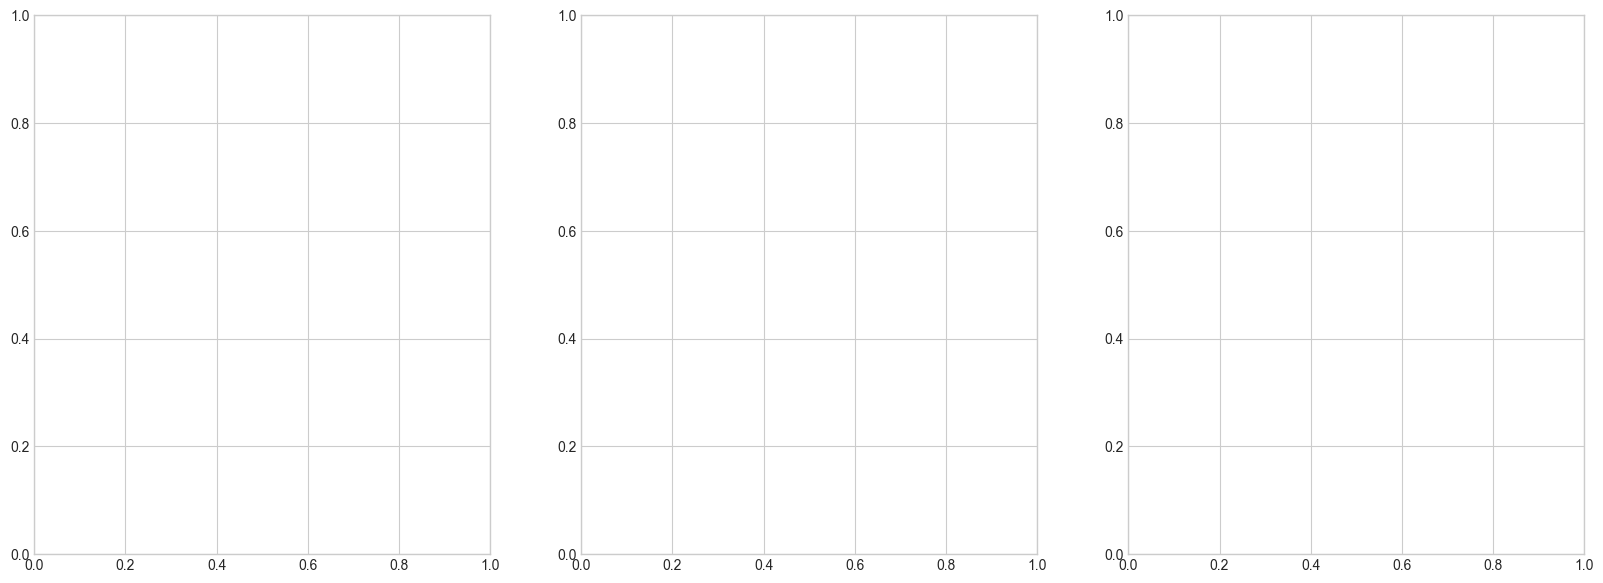

In [42]:
# Visualization 7: Hormone Receptor Status and Survival
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# ER Status
sns.boxplot(x='ER Status Recode Breast Cancer (1990+)', y='interva_years', 
            hue='COD to site recode', data=df, ax=axes[0])

# Add proper labels for ER Status
if 'ER Status Recode Breast Cancer (1990+)' in mapping_dict:
    x_labels = []
    for code in sorted(df['ER Status Recode Breast Cancer (1990+)'].unique()):
        for orig, enc in mapping_dict['ER Status Recode Breast Cancer (1990+)'].items():
            if enc == code:
                x_labels.append(orig)
                break
        else:
            x_labels.append(f"Code {code}")
    axes[0].set_xticklabels(x_labels)

axes[0].set_title('ER Status and Survival', fontsize=16)
axes[0].set_xlabel('ER Status', fontsize=14)
axes[0].set_ylabel('Survival Time (Years)', fontsize=14)

# PR Status
sns.boxplot(x='PR Status Recode Breast Cancer (1990+)', y='interva_years', 
            hue='COD to site recode', data=df, ax=axes[1])

# Add proper labels for PR Status
if 'PR Status Recode Breast Cancer (1990+)' in mapping_dict:
    x_labels = []
    for code in sorted(df['PR Status Recode Breast Cancer (1990+)'].unique()):
        for orig, enc in mapping_dict['PR Status Recode Breast Cancer (1990+)'].items():
            if enc == code:
                x_labels.append(orig)
                break
        else:
            x_labels.append(f"Code {code}")
    axes[1].set_xticklabels(x_labels)

axes[1].set_title('PR Status and Survival', fontsize=16)
axes[1].set_xlabel('PR Status', fontsize=14)
axes[1].set_ylabel('Survival Time (Years)', fontsize=14)

# HER2 Status
sns.boxplot

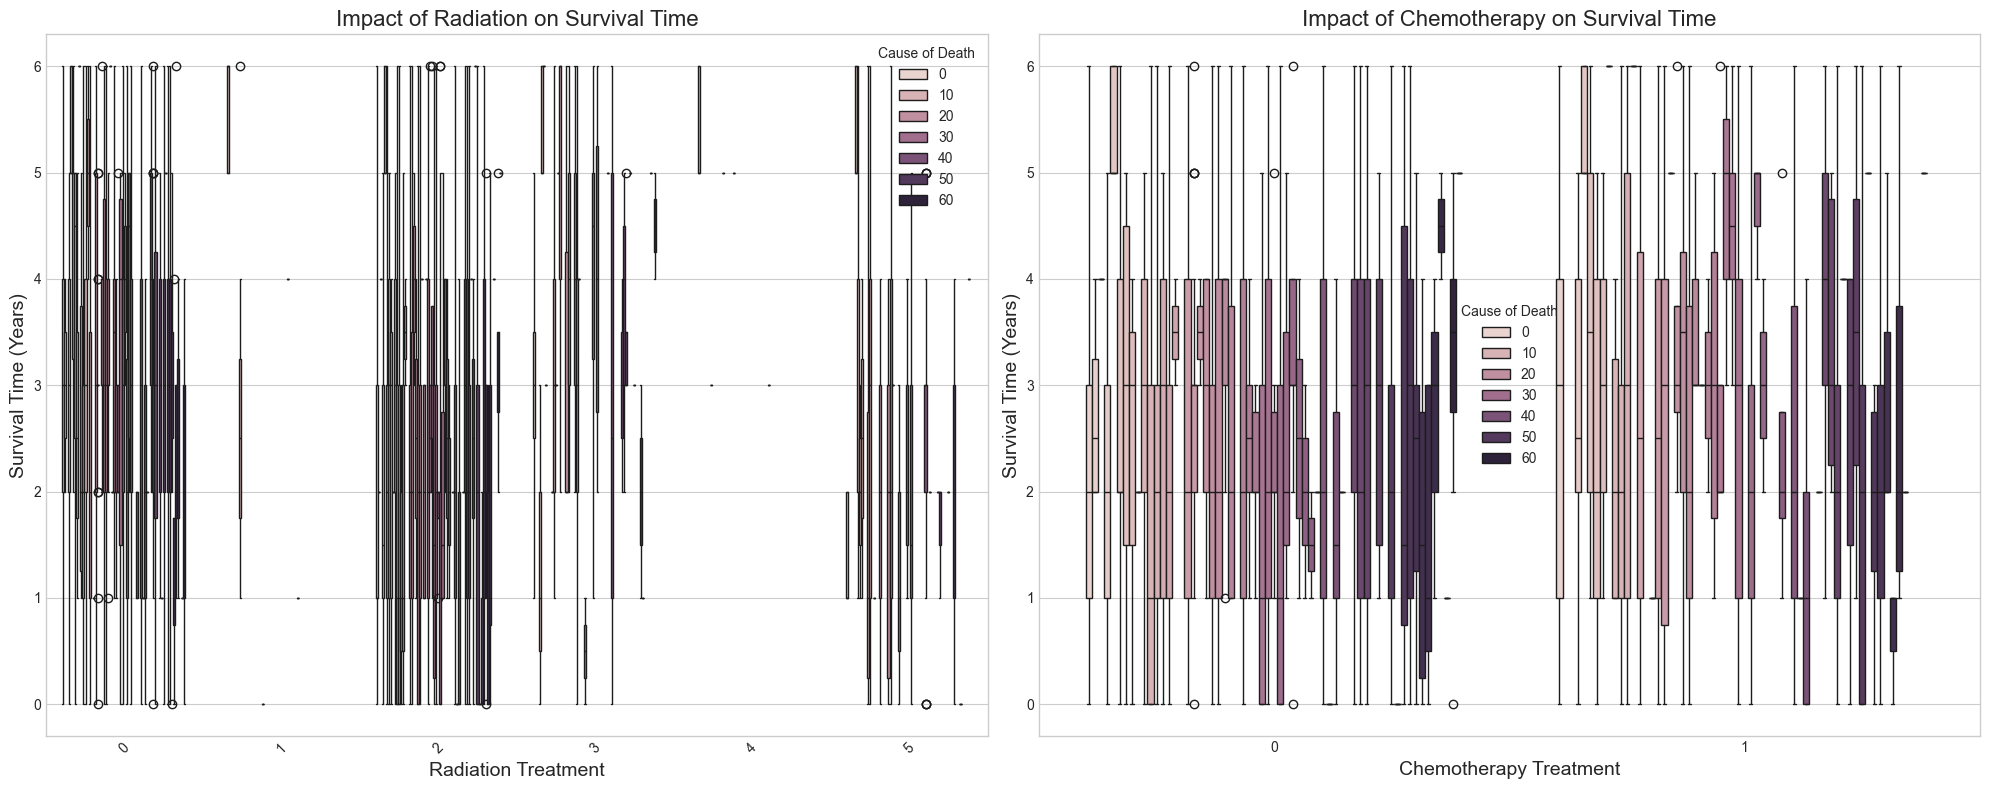

In [43]:
# Visualization 4: Treatment impact on survival
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Radiation impact
sns.boxplot(x='Radiation recode', y='interva_years', hue='COD to site recode', 
            data=df_original, ax=axes[0])
axes[0].set_title('Impact of Radiation on Survival Time', fontsize=16)
axes[0].set_xlabel('Radiation Treatment', fontsize=14)
axes[0].set_ylabel('Survival Time (Years)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Cause of Death')

# Chemotherapy impact
sns.boxplot(x='Chemotherapy recode', y='interva_years', hue='COD to site recode', 
            data=df_original, ax=axes[1])
axes[1].set_title('Impact of Chemotherapy on Survival Time', fontsize=16)
axes[1].set_xlabel('Chemotherapy Treatment', fontsize=14)
axes[1].set_ylabel('Survival Time (Years)', fontsize=14)
axes[1].legend(title='Cause of Death')

plt.tight_layout()
plt.show()